# Project Description

In this project I will be working on an unclean dataset that contains information of several thousands 
cars’ resale value that were obtained from UK’s craiglist.

# 2. Library import and data loading

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#loading dataset
df = pd.read_csv("unclean_data.csv")

#looking at the head of the dataframe
df.head()

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,"£30,495",Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,"£29,989",Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,"£37,899",Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,"£30,399",Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,"£29,899",Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660


# 3. Data Analysis, Preparation and Wrangling

## Handling missing rows

In [2]:
#Checking NaN's 
print(df.isna().sum())
print()

#Drop the rows where all elements are missing
df.dropna(axis = 0, how = 'all', inplace = True)

#Reset the index of the dataframe
df.reset_index(drop=True)

model             99
year             102
price             99
transmission      99
mileage          198
fuel type       2677
engine size      164
mileage2         116
fuel type2       198
engine size2     198
reference         99
dtype: int64



,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,"£30,495",Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,"£29,989",Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,"£37,899",Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,"£30,399",Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,"£29,899",Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660
...,...,...,...,...,...,...,...,...,...,...,...
3902,C Class,2017.0,"£14,700",Manual,"31,357",25,£150,70.6,Diesel,1.598,/ad/25451436
3903,C Class,2018.0,"£18,500",Automatic,"28,248",31,£150,64.2,Diesel,2.143,/ad/25451481
3904,C Class,2014.0,"£11,900",Manual,"48,055",31,£20,65.7,Diesel,2.143,/ad/25057204
3905,C Class,2014.0,"£11,300",Automatic,"49,865",46,£145,56.5,Diesel,2.143,/ad/25144481


In [3]:
#Create a copy of the dataframe
df1 = df.copy()

#Checking NaN's 
print(df1.isna().sum())

model              0
year               3
price              0
transmission       0
mileage           99
fuel type       2578
engine size       65
mileage2          17
fuel type2        99
engine size2      99
reference          0
dtype: int64


## Handling the currency symbols and comma format in 'price' column

In [4]:
# Removing special character and symbols in the price column
df1.price = df1.price.apply(lambda x:x.replace('£','').replace(',',''))

#Convert price column to a numeric type
df1["price"] = pd.to_numeric(df1["price"])

## Rename fuel_type and engine_size columns

In [5]:
#rename the following columns: “fuel type”, “fuel type2”, “engine size”, and “engine size2” 
#into “fuel_type”, “fuel_type2”, “engine_size” and “engine_size2” respectively.

#fuel_type
df1.rename(columns = {'fuel type2':'fuel_type2'}, inplace = True)
df1.rename(columns = {'fuel type':'fuel_type'}, inplace = True)

#engine_size
df1.rename(columns = {'engine size':'engine_size'}, inplace = True)
df1.rename(columns = {'engine size2':'engine_size2'}, inplace = True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3907 entries, 0 to 4005
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3907 non-null   object 
 1   year          3904 non-null   float64
 2   price         3907 non-null   int64  
 3   transmission  3907 non-null   object 
 4   mileage       3808 non-null   object 
 5   fuel_type     1329 non-null   object 
 6   engine_size   3842 non-null   object 
 7   mileage2      3890 non-null   object 
 8   fuel_type2    3808 non-null   object 
 9   engine_size2  3808 non-null   object 
 10  reference     3907 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 366.3+ KB


## Fill NA/NaN missing values in: fuel_type

In [6]:
#filling the missing values in "fuel_types2" column with values from "fuel_type" column
df1['fuel_type2'] = df1['fuel_type2'].fillna(df1['fuel_type'])

#drop fuel_type column
df1.drop(['fuel_type'], axis=1, inplace = True)

#reset index
df1.reset_index(drop=True)

#rename 'fuel_type2' column
df1.rename(columns = {'fuel_type2':'fuel_type'}, inplace = True)

In [7]:
#Create a copy
df2 = df1.copy()

#Check NaN

print(df2.isna().sum())
print()
df2.info()

model            0
year             3
price            0
transmission     0
mileage         99
engine_size     65
mileage2        17
fuel_type        0
engine_size2    99
reference        0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3907 entries, 0 to 4005
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3907 non-null   object 
 1   year          3904 non-null   float64
 2   price         3907 non-null   int64  
 3   transmission  3907 non-null   object 
 4   mileage       3808 non-null   object 
 5   engine_size   3842 non-null   object 
 6   mileage2      3890 non-null   object 
 7   fuel_type     3907 non-null   object 
 8   engine_size2  3808 non-null   object 
 9   reference     3907 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 335.8+ KB


# Handling the comma format in 'mileage' columns

In [8]:
#remove commas
df2['mileage'] = df2['mileage'].str.replace(',', '', regex=True)
df2['mileage2'] = df2['mileage2'].str.replace(',', '', regex=True)

## Fill NA/NaN missing values in: milage

In [9]:
#fill the missing values in milage column with values from column milage2
df2['mileage'] = df2['mileage'].fillna(df2['mileage2'])

#dropping the rows that contain "Unknown"
df2 = df2[df2["mileage"].str.contains("Unknown") == False]

# drop fuel_type column
df2.drop(['mileage2'], axis=1, inplace = True)

#reset index
df2.reset_index(drop=True)

#Convert milage column to a numeric type
df2["mileage"] = pd.to_numeric(df2["mileage"])


In [10]:
#Create a copy
df3 = df2.copy()

print(df3.isna().sum())
print()
df3.info()

model            0
year             3
price            0
transmission     0
mileage          0
engine_size     64
fuel_type        0
engine_size2    98
reference        0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3903 entries, 0 to 4005
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3903 non-null   object 
 1   year          3900 non-null   float64
 2   price         3903 non-null   int64  
 3   transmission  3903 non-null   object 
 4   mileage       3903 non-null   int64  
 5   engine_size   3839 non-null   object 
 6   fuel_type     3903 non-null   object 
 7   engine_size2  3805 non-null   object 
 8   reference     3903 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 304.9+ KB


## Fill NA/NaN missing values in: engine_size

In [11]:
#fill the missing values in engine_size2 column with values from column engine_size
df3['engine_size2'] = df3['engine_size2'].fillna(df3['engine_size'])

#Drop the rows where any elements are missing
#df3.dropna(subset=['engine_size2'], inplace = True)

#Drop unnecessary column
df3.drop(['engine_size'], axis=1, inplace = True)

#Reindex 
df3.reset_index(drop=True)

#Create a copy
df4 = df3.copy()

print(df4.isna().sum())
print()
df4.info()


model           0
year            3
price           0
transmission    0
mileage         0
fuel_type       0
engine_size2    0
reference       0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3903 entries, 0 to 4005
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3903 non-null   object 
 1   year          3900 non-null   float64
 2   price         3903 non-null   int64  
 3   transmission  3903 non-null   object 
 4   mileage       3903 non-null   int64  
 5   fuel_type     3903 non-null   object 
 6   engine_size2  3903 non-null   object 
 7   reference     3903 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 274.4+ KB


## Handling different values standard in columns: engine_size

In [12]:
#Delete unneccesaries strings and symbols
df4['engine_size2'] = df4['engine_size2'].str.replace('\W', '', regex=True)
df4['engine_size2'] = df4['engine_size2'].str.replace('CC', '', regex=True)

#Delete unneccesaries strings values
df4 = df4[df4["engine_size2"].str.contains("Unknown") == False]

print(df4.isna().sum())
print()
df4.info()

model           0
year            3
price           0
transmission    0
mileage         0
fuel_type       0
engine_size2    0
reference       0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3902 entries, 0 to 4005
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3902 non-null   object 
 1   year          3899 non-null   float64
 2   price         3902 non-null   int64  
 3   transmission  3902 non-null   object 
 4   mileage       3902 non-null   int64  
 5   fuel_type     3902 non-null   object 
 6   engine_size2  3902 non-null   object 
 7   reference     3902 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 274.4+ KB


In [13]:
#Rename 'engine_size2' as 'engine_size'
df4.rename(columns = {'engine_size2':'engine_size'}, inplace = True)

#Convert engine_size2 column to a numeric type as float
df4['engine_size'] = pd.to_numeric(df4['engine_size'], errors='coerce')
df4['engine_size'] = df4['engine_size'].astype(float)

print(df4.isna().sum())
print()
df4.info()

model           0
year            3
price           0
transmission    0
mileage         0
fuel_type       0
engine_size     0
reference       0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3902 entries, 0 to 4005
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3902 non-null   object 
 1   year          3899 non-null   float64
 2   price         3902 non-null   int64  
 3   transmission  3902 non-null   object 
 4   mileage       3902 non-null   int64  
 5   fuel_type     3902 non-null   object 
 6   engine_size   3902 non-null   float64
 7   reference     3902 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 274.4+ KB


## Standarizing values in engine_size column

In [14]:
#Standarizing values using Lambda function in engine_size column
df4['engine_size'] = df4['engine_size'].apply(lambda x: round(x/1000,1) if x>1000 else round(x,1))

## Handling wrong data type: year

In [15]:
#drop NaN value in year column
df4.dropna(subset=['year'], inplace = True)

#reindex year column
df4.reset_index(drop=True)

#formatting year column as int64
df4['year'] = df4['year'].apply(np.int64)


print(df4.isna().sum())
print()
df4.info()

#Create a copy
df5 = df4.copy()

model           0
year            0
price           0
transmission    0
mileage         0
fuel_type       0
engine_size     0
reference       0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3899 entries, 0 to 4005
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3899 non-null   object 
 1   year          3899 non-null   int64  
 2   price         3899 non-null   int64  
 3   transmission  3899 non-null   object 
 4   mileage       3899 non-null   int64  
 5   fuel_type     3899 non-null   object 
 6   engine_size   3899 non-null   float64
 7   reference     3899 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 274.1+ KB


## Handling unneeded columns

In [16]:
#Dropping unnecesssaries columns as model and reference columns
df5.drop(['model'], axis=1, inplace = True)
df5.drop(['reference'], axis=1, inplace = True)

In [17]:
df5.dtypes

year              int64
price             int64
transmission     object
mileage           int64
fuel_type        object
engine_size     float64
dtype: object

## Handling categorical data (dummy variables)

In [18]:
#convert categorical variables into dummies variable
transmission = pd.get_dummies(df5['transmission'])

#rename columns
transmission.rename(columns = {'Other':'special'}, inplace = True)
transmission.rename(columns = {'Semi-Auto':'semi_auto'}, inplace = True)

#formatting name columns into lower case names
transmission.columns = transmission.columns.str.lower()

In [19]:
#convert categorical variables into dummies variable
fuel_type = pd.get_dummies(df5['fuel_type'])

#rename columns
fuel_type.rename(columns = {'Other':'Special_fuel'}, inplace = True)

#formatting name columns into lower case names
fuel_type.columns = fuel_type.columns.str.lower() #Lower case columns

## Drop unnecesary columns

In [20]:
df5.drop(['transmission'], axis=1, inplace = True)
df5.drop(['fuel_type'], axis=1, inplace = True)

## Joining on index dummies variables

In [21]:
#joining dummy transmission variable to main dataframe
df5 = df5.join(transmission)

In [22]:
#joining dummy fuel_type variable to main dataframe
df5 = df5.join(fuel_type)

In [23]:
#Creata a final cleaned copy data
cleaned_data_proj01 = df5.copy()

## Save cleaned data in csv file

In [24]:
#Peak of information cleaned dataset
cleaned_data_proj01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3899 entries, 0 to 4005
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          3899 non-null   int64  
 1   price         3899 non-null   int64  
 2   mileage       3899 non-null   int64  
 3   engine_size   3899 non-null   float64
 4   automatic     3899 non-null   uint8  
 5   manual        3899 non-null   uint8  
 6   special       3899 non-null   uint8  
 7   semi_auto     3899 non-null   uint8  
 8   diesel        3899 non-null   uint8  
 9   hybrid        3899 non-null   uint8  
 10  special_fuel  3899 non-null   uint8  
 11  petrol        3899 non-null   uint8  
dtypes: float64(1), int64(3), uint8(8)
memory usage: 311.8 KB


In [25]:
#Checking NaN values
print(cleaned_data_proj01.isna().sum())

year            0
price           0
mileage         0
engine_size     0
automatic       0
manual          0
special         0
semi_auto       0
diesel          0
hybrid          0
special_fuel    0
petrol          0
dtype: int64


In [26]:
#saving cleaned data in CSV format file
cleaned_data_proj01.to_csv('cleaned_data_proj01.csv')

# 4. Exploratory Data Analyis and Visualization

#### loading libraries

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned_data_proj01.csv')
df.drop(['Unnamed: 0'], axis=1, inplace = True)
df.head()
#df.info()

,year,price,mileage,engine_size,automatic,manual,special,semi_auto,diesel,hybrid,special_fuel,petrol
0,2020,30495,1200,2.0,1,0,0,0,1,0,0,0
1,2020,29989,1000,15.0,1,0,0,0,0,0,0,1
2,2020,37899,500,2.0,1,0,0,0,1,0,0,0
3,2019,30399,5000,2.0,1,0,0,0,1,0,0,0
4,2019,29899,4500,2.0,1,0,0,0,1,0,0,0


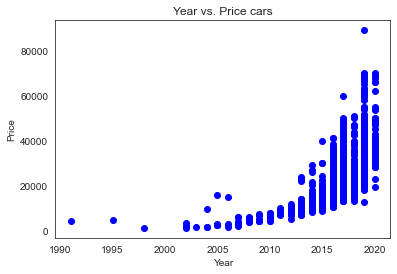

In [46]:
plt.scatter(df.year, df.price, color='blue')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Year vs. Price cars')
plt.show()

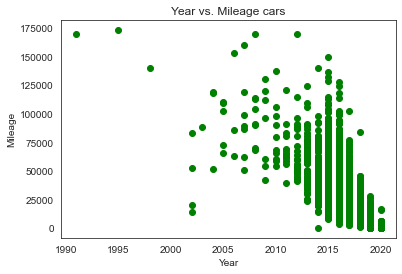

In [47]:
plt.scatter(df.year, df.mileage, color='green')
plt.xlabel('Year')
plt.ylabel('Mileage')
plt.title('Year vs. Mileage cars')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

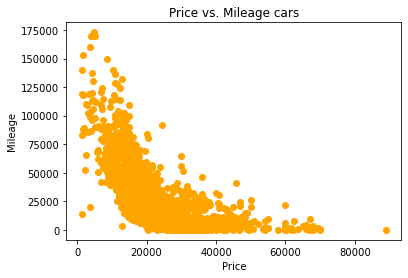

In [30]:
plt.scatter(df.price, df.mileage, color='orange')
plt.xlabel('Price')
plt.ylabel('Mileage')
plt.title('Price vs. Mileage cars')
plt.show

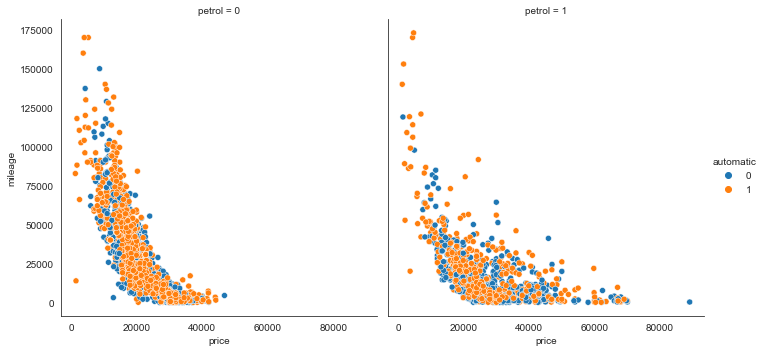

In [44]:
# relplot shows relationship between variables
sns.relplot(
    data=df,
    x="price", y="mileage", col="petrol",
    hue="automatic"
)
plt.show()

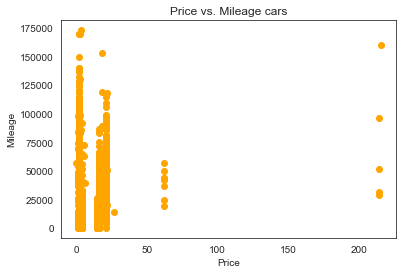

In [45]:
plt.scatter(df.engine_size, df.mileage, color='orange')
plt.xlabel('Price')
plt.ylabel('Mileage')
plt.title('Price vs. Mileage cars')
plt.show()

<AxesSubplot:>

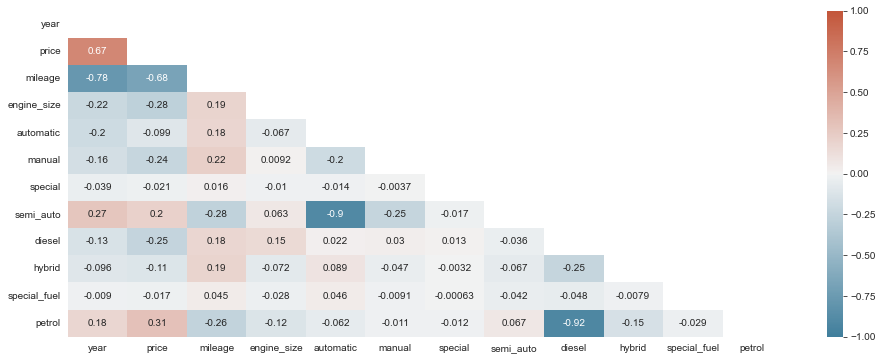

In [43]:
#Correlation
corr = df.corr()

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(16, 6))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, mask = mask, cmap=cmap)


Correlation is used in linear regression models to determine __the strength of the relationship__ between the dependent and independent variables. In case there is a strongly positive or negative correlation, the predictor variables can be considered as __features for training the models__.


- price & year are having strong positive correlation.
- mileage & year strong negative correlation
- price & mileage stronge negative correlation
- Generally speaking, a Pearson correlation coefficient value greater than 0.7 indicates the presence of multi-collinearity.

__Correlation__ is often used in machine learning to __identify multicollinearity__, which is when two or more predictor variables are highly correlated with each other. __Multicollinearity can impact the accuracy of predictive models__, so it’s important to __identify and remove predictors that are associated with high multicollinearity__. There are different methods for identifying multicollinearity, but one common method is to calculate the variance inflation factor (VIF), which measures the degree of correlation between predictor variables. Variance inflation factor (VIF) is a measure of how much the variance of a parameter is increased by collinearity. VIFs are typically used in statistical modeling to assess multicollinearity and to help select model variables. In machine learning, VIF can be used to reduce the dimensionality of data by removing features that are highly correlated with each other. By reducing multicollinearity, VIF can improve the accuracy of predictions and prevent overfitting. Multicollinearity can be addressed either removing one of the correlated variables or by using regularization techniques. Regularization techniques penalize model complexity, which helps to prevent overfitting. In addition, feature engineering techniques can be used to create new features that are not strongly correlated with each other.